In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

In [62]:
df_india = pd.read_csv("covid_19_india.csv")
df_india

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [63]:
# Checking the range of data
df_india.shape

(18110, 9)

In [64]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [65]:
df_india.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [66]:
df_india.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [67]:
# finding unique values from 'State/UnionTerritory' column
df_india['State/UnionTerritory'].unique(),df_india['State/UnionTerritory'].nunique()

(array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
        'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
        'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
        'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
        'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
        'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
        'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
        'Tripura', 'Nagaland', 'Meghalaya',
        'Dadra and Nagar Haveli and Daman and Diu',
        'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
        'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
        'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
        'Maharashtra***'], dtype=object),
 46)

In [68]:
# Correcting spelling mistakes or impurities

state_correction_dict = {
    'Bihar****':'Bihar',
    'Dadra and Nagar Haveli':'Dadra and Nagar Haveli and Daman and Diu',
    'Madhya Pradesh***':'Madhya Pradesh',
    'Maharashtra***':'Maharashtra',
    'Karanataka':'Karnataka',
    'Himanchal Pradesh':'Himachal Pradesh',
    'Telengana':'Telangana'
}

In [69]:
# Apply the corrections
df_india['State/UnionTerritory'] = df_india['State/UnionTerritory'].replace(state_correction_dict)
df_india

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [70]:
# Changing the format of date
df_india['Date'] = pd.to_datetime(df_india['Date'])
df_india['Date'] = df_india['Date'].dt.strftime('%d-%m-%Y')
df_india['Date']

0        30-01-2020
1        31-01-2020
2        01-02-2020
3        02-02-2020
4        03-02-2020
            ...    
18105    11-08-2021
18106    11-08-2021
18107    11-08-2021
18108    11-08-2021
18109    11-08-2021
Name: Date, Length: 18110, dtype: object

In [71]:
# Removing unwanted columns from dataset using 'drop'
df_india.drop(['Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis = 1,inplace = True)
df_india

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,30-01-2020,Kerala,0,0,1
1,2,31-01-2020,Kerala,0,0,1
2,3,01-02-2020,Kerala,0,0,2
3,4,02-02-2020,Kerala,0,0,3
4,5,03-02-2020,Kerala,0,0,3
...,...,...,...,...,...,...
18105,18106,11-08-2021,Telangana,638410,3831,650353
18106,18107,11-08-2021,Tripura,77811,773,80660
18107,18108,11-08-2021,Uttarakhand,334650,7368,342462
18108,18109,11-08-2021,Uttar Pradesh,1685492,22775,1708812


**Data Manipulation**

In [72]:
# Identifying active cases , We counted the values by using values in confirmed, cured, deaths column
df_india['Active'] = df_india['Confirmed'] - df_india['Cured'] - df_india['Deaths']
df_india

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,1,30-01-2020,Kerala,0,0,1,1
1,2,31-01-2020,Kerala,0,0,1,1
2,3,01-02-2020,Kerala,0,0,2,2
3,4,02-02-2020,Kerala,0,0,3,3
4,5,03-02-2020,Kerala,0,0,3,3
...,...,...,...,...,...,...,...
18105,18106,11-08-2021,Telangana,638410,3831,650353,8112
18106,18107,11-08-2021,Tripura,77811,773,80660,2076
18107,18108,11-08-2021,Uttarakhand,334650,7368,342462,444
18108,18109,11-08-2021,Uttar Pradesh,1685492,22775,1708812,545


In [73]:
#Using pivot function to find cured , deaths , confirmed cases State wise
statewise = pd.pivot_table(df_india,values=['Cured','Deaths','Confirmed'],index='State/UnionTerritory',aggfunc='max',margins=True)
statewise

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544
Dadra and Nagar Haveli and Daman and Diu,10654,10646,4


In [74]:
# Top 10 states with most Active cases

df_top_10 = df_india.nlargest(10,['Active'])

df_top_10 = df_india.groupby(['State/UnionTerritory'])['Active'].max().sort_values(ascending=False).reset_index()
df_top = df_top_10.nlargest(10,['Active'])
df_top

,State/UnionTerritory,Active
0,Maharashtra,701614
1,Karnataka,605515
2,Kerala,445692
3,Tamil Nadu,313048
4,Uttar Pradesh,310783
5,Rajasthan,212753
6,Andhra Pradesh,211554
7,Gujarat,148297
8,West Bengal,132181
9,Chhattisgarh,131245


In [75]:
# Top 10 states with most deaths cases
df_deaths_10 = df_india.nlargest(10,['Deaths'])

df_deaths_10 = df_india.groupby(['State/UnionTerritory'])['Deaths'].max().sort_values(ascending=False).reset_index()
df_deaths = df_deaths_10.nlargest(10,['Deaths'])

df_deaths

,State/UnionTerritory,Deaths
0,Maharashtra,134201
1,Karnataka,36848
2,Tamil Nadu,34367
3,Delhi,25068
4,Uttar Pradesh,22775
5,West Bengal,18252
6,Kerala,18004
7,Punjab,16322
8,Andhra Pradesh,13564
9,Chhattisgarh,13544


In [76]:
# "Finding recovery rate and deathrate"
statewise['Recoveryrate'] = statewise['Cured']*100/statewise['Confirmed']
statewise['Deathrate'] = statewise['Deaths']*100/statewise['Confirmed']
statewise

,Confirmed,Cured,Deaths,Recoveryrate,Deathrate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,248,94.498567,0.490070
Assam,576149,559684,5420,97.142232,0.940729
Bihar,725279,715352,9646,98.631285,1.329971
Cases being reassigned to states,9265,0,0,0.000000,0.000000
Chandigarh,61992,61150,811,98.641760,1.308233
Chhattisgarh,1003356,988189,13544,98.488373,1.349870
Dadra and Nagar Haveli and Daman and Diu,10654,10646,4,99.924911,0.037545


In [77]:
# "Correlation amongs the columns"
statewise.corr()

,Confirmed,Cured,Deaths,Recoveryrate,Deathrate
Confirmed,1.000000,0.999931,0.939375,0.198418,0.276637
Cured,0.999931,1.000000,0.940149,0.200655,0.278616
Deaths,0.939375,0.940149,1.000000,0.151146,0.387905
Recoveryrate,0.198418,0.200655,0.151146,1.000000,0.540693
Deathrate,0.276637,0.278616,0.387905,0.540693,1.000000


Total Confirmed cases = 5451678687
Total Cured cases = 5046125452
Total Active cases = 332164230
Total Death cases = 73389005


<ipython-input-78-9d422c5a0492>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_yticklabels(labels=(barplot.get_yticks()*1).astype(int))


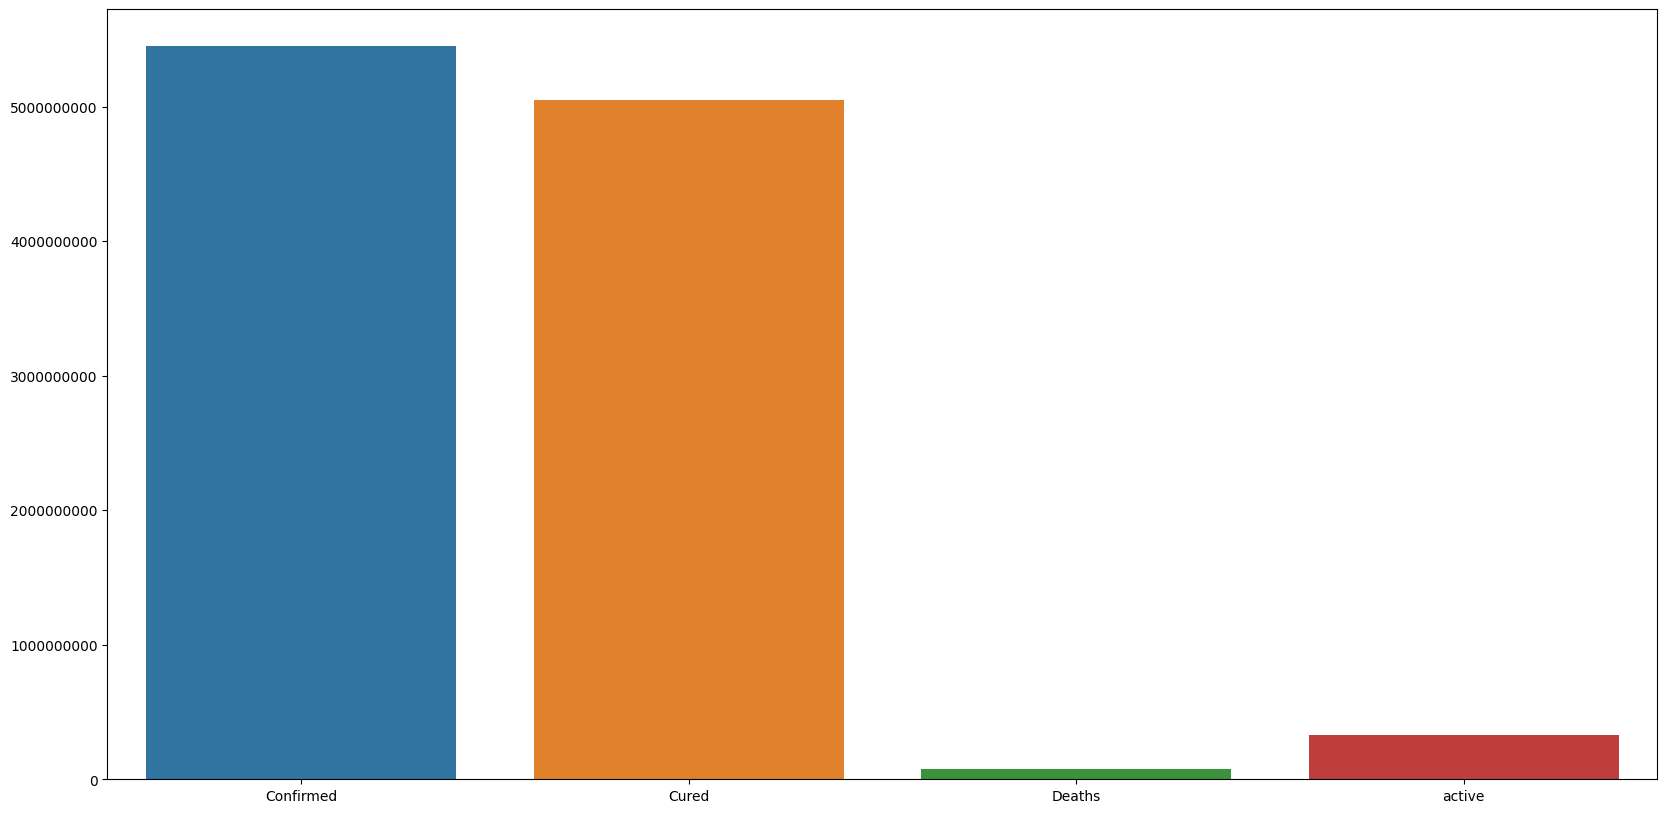

In [78]:
"Barplot for Confirmed , Deaths , Cured , Active"
fig = plt.figure(figsize=(20,10))

confirm= df_india['Confirmed'].sum()
cured = df_india['Cured'].sum()
deaths= df_india['Deaths'].sum()
active= df_india['Active'].sum()

print('Total Confirmed cases =',confirm)
print('Total Cured cases =',cured)
print('Total Active cases =',active)
print('Total Death cases =',deaths)

barplot = sns.barplot(x=['Confirmed','Cured','Deaths','active'],y=[confirm,cured,deaths,active])
barplot.set_yticklabels(labels=(barplot.get_yticks()*1).astype(int))

plt.show()

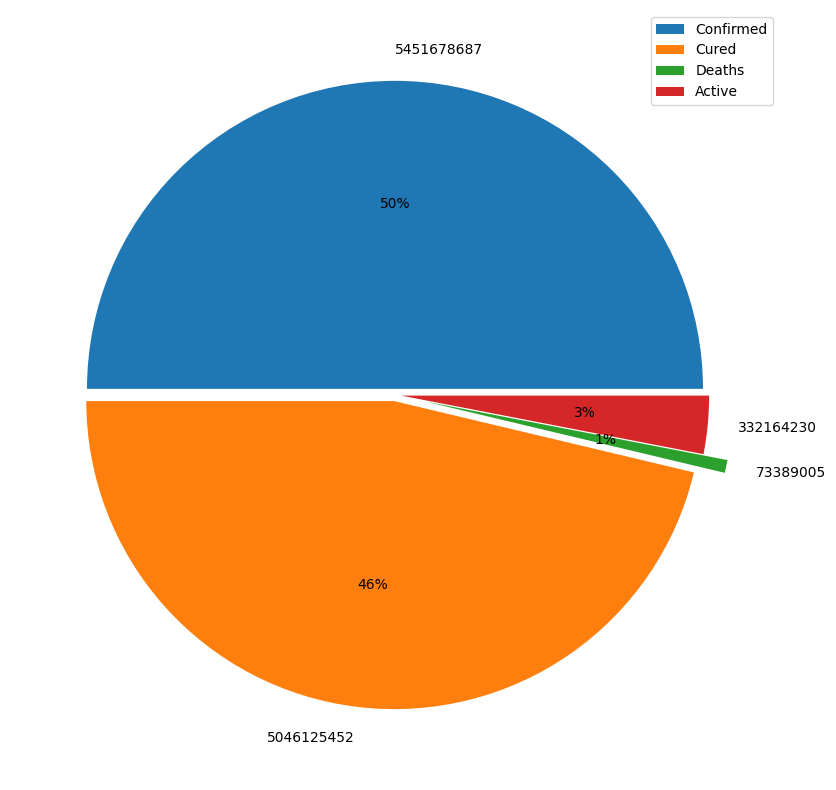

In [79]:
"Piechart for 'Confirmed','Cured',Deaths & 'Active'"

fig = plt.figure(figsize=(17,10))
df_values = [df_india['Confirmed'].sum(),df_india['Cured'].sum(),df_india['Deaths'].sum(),df_india['Active'].sum()]
df_keys = [confirm,cured,deaths,active]


plt.pie(df_keys,labels = df_keys, explode = (0.02,0.02,0.1,0.02), autopct = '%.0f%%')
plt.legend(['Confirmed','Cured','Deaths','Active'])


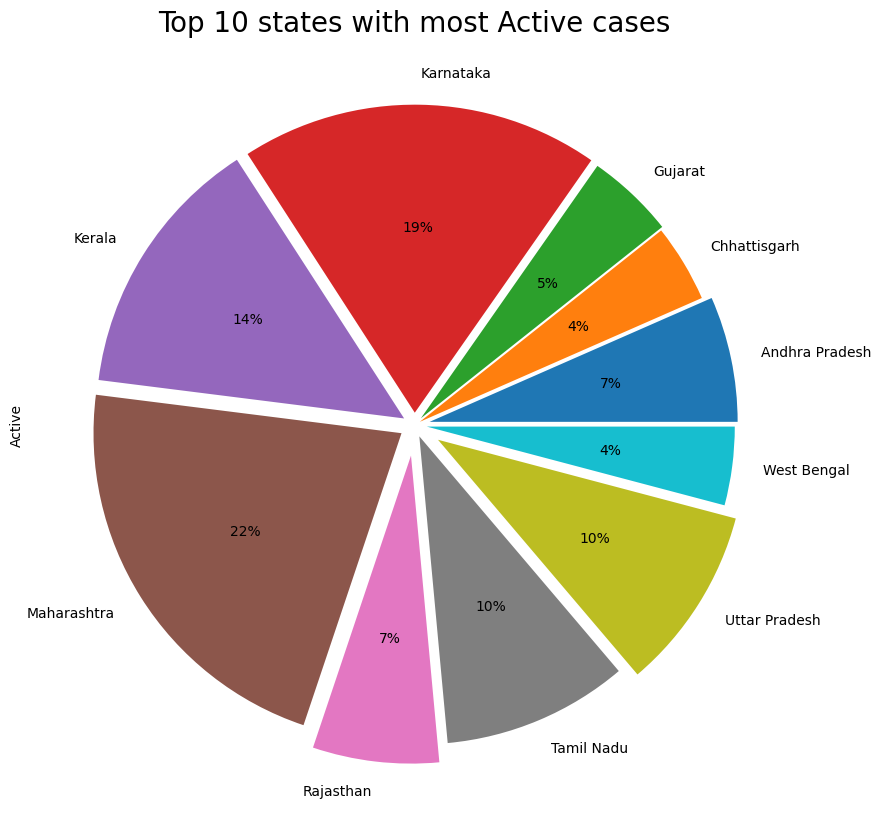

In [80]:
"Pie Chart Of 10 Top states with Active Cases"

fig = plt.figure(figsize=(17,10))
df_top.groupby(["State/UnionTerritory"]).sum()["Active"].plot(kind='pie',rot=90,explode=(0.05,0.02,0.03,0.04,0.04,0.05,0.1,0.04,0.09,0.04),autopct='%1.0f%%')
plt.title('Top 10 states with most Active cases',size=20)
plt.show()

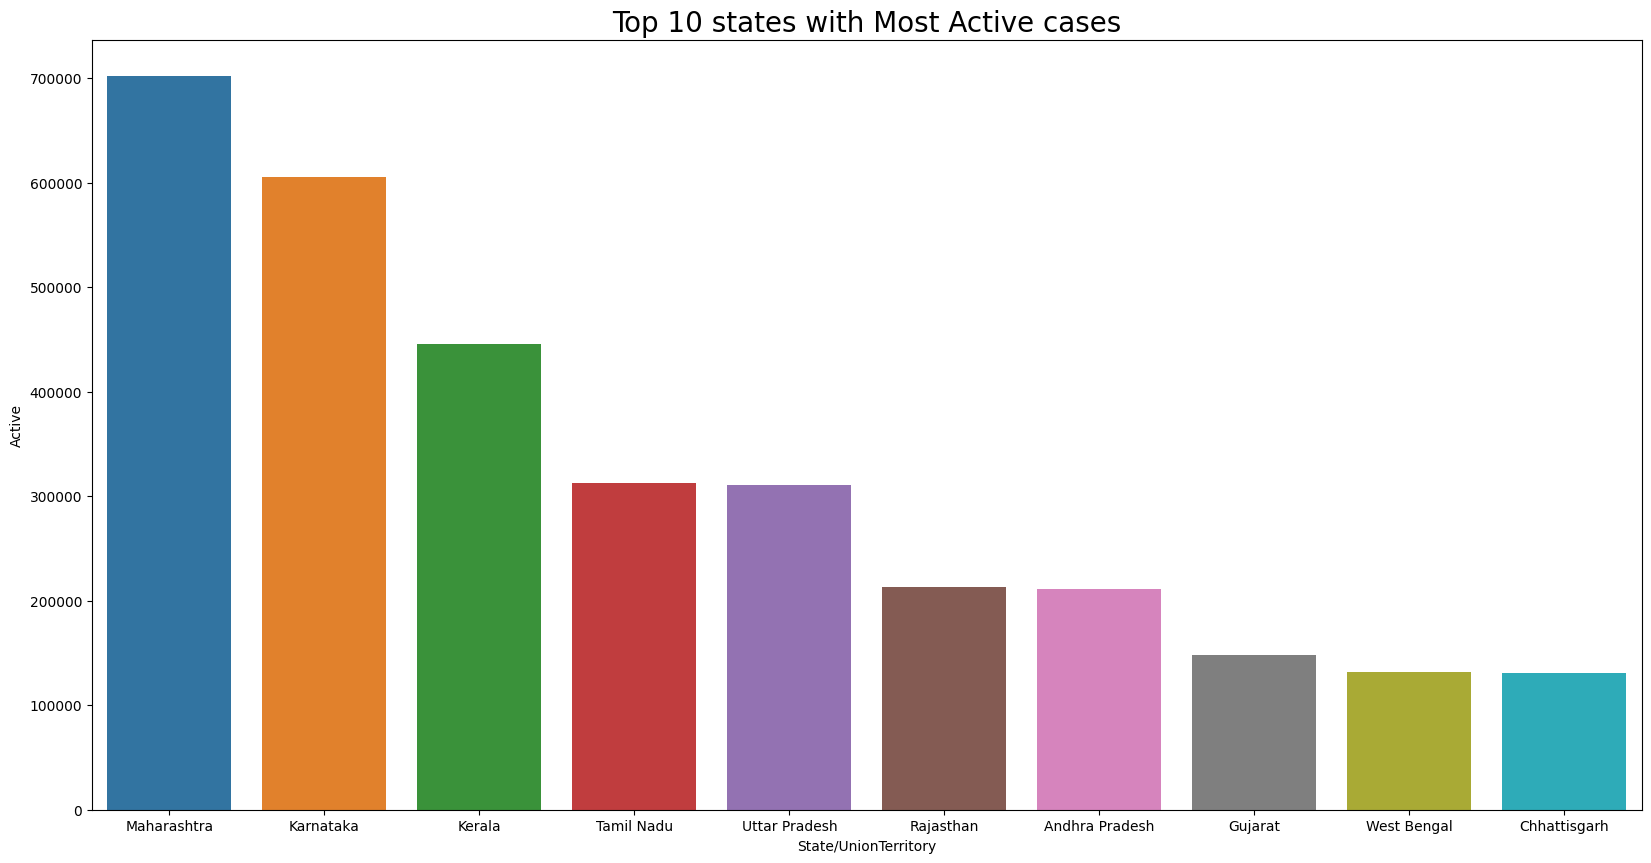

In [81]:
"Bar Plot Of Top 10 Active Cases"

fig = plt.figure(figsize=(20,10))
sns.barplot(data = df_top.iloc[:10],y='Active',x='State/UnionTerritory')
plt.title('Top 10 states with Most Active cases', size=20)
plt.show()

Text(0.5, 1.0, 'Pie chart of top 10 states with most death cases')

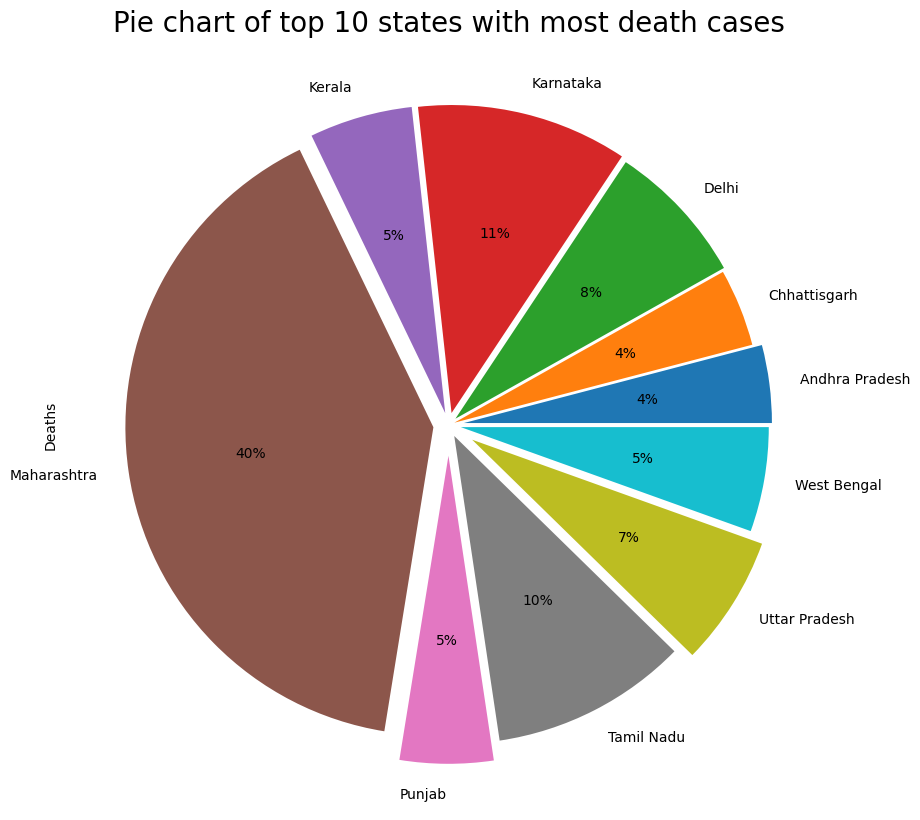

In [82]:
"Pie chart of top 10 states with most death cases"
fig = plt.figure(figsize=(17,10))
df_deaths.groupby(["State/UnionTerritory"]).sum()["Deaths"].plot(kind='pie',rot=90,explode=(0.05,0.02,0.03,0.04,0.04,0.05,0.1,0.04,0.09,0.04),autopct='%1.0f%%')
plt.title("Pie chart of top 10 states with most death cases",size = 20)

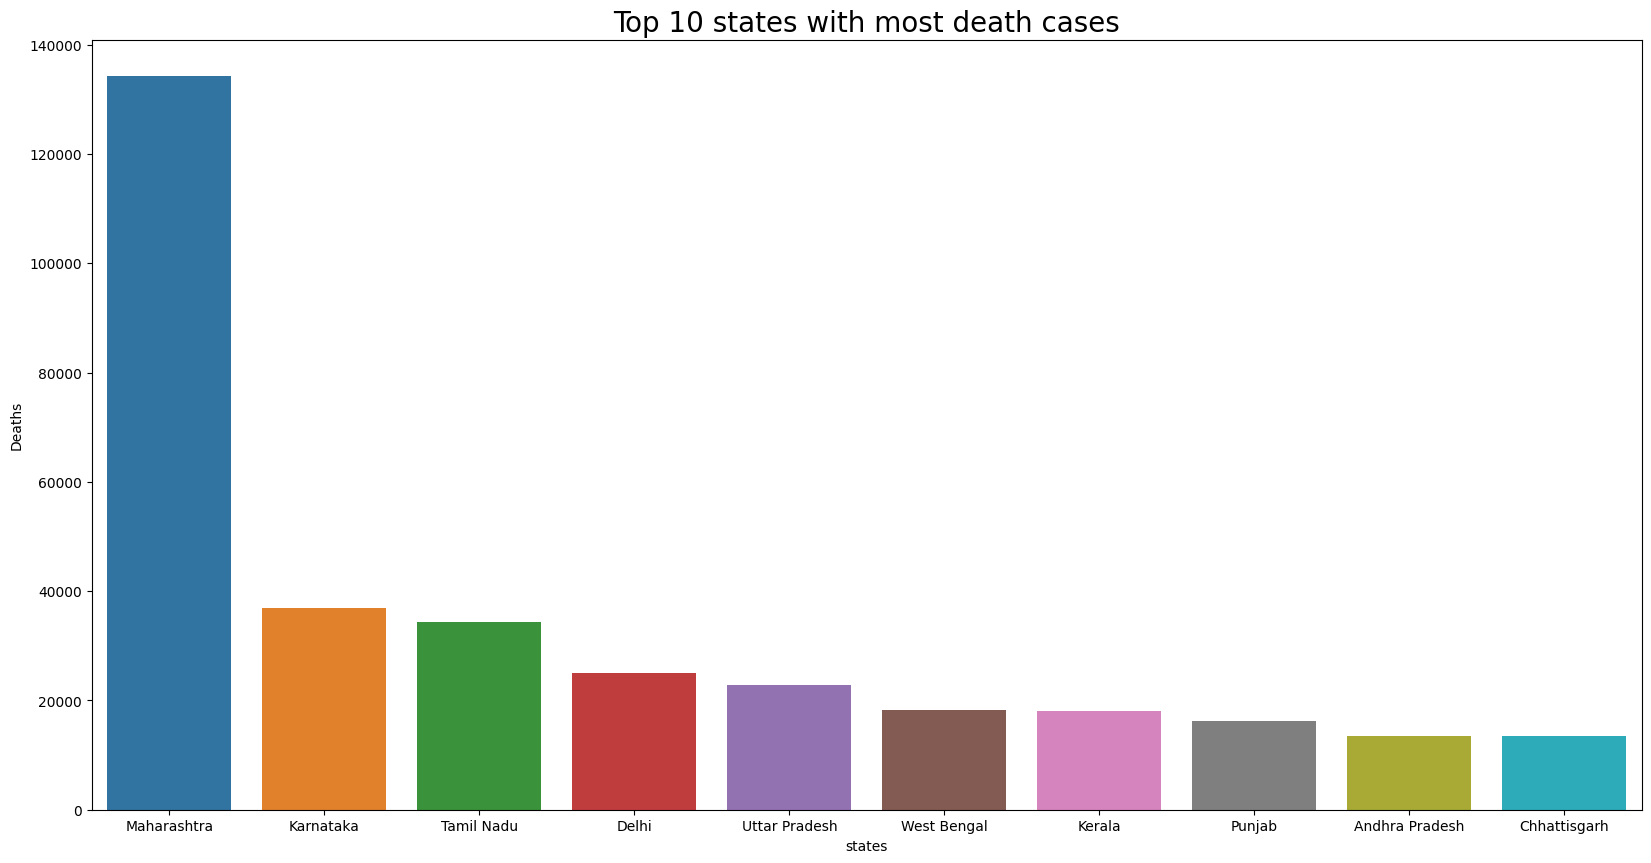

In [83]:
"Bar graph with top 10 states with most Death cases"


df_deaths = df_india.groupby('State/UnionTerritory').max()[['Deaths','Date']].sort_values(by='Deaths',ascending=False).reset_index()
fig = plt.figure(figsize=(20,10))
plot1 = sns.barplot(data = df_deaths.iloc[:10],y='Deaths',x='State/UnionTerritory')
plt.title('Top 10 states with most death cases', size=20)
plt.xlabel('states')
plt.ylabel('Deaths')
plt.show()

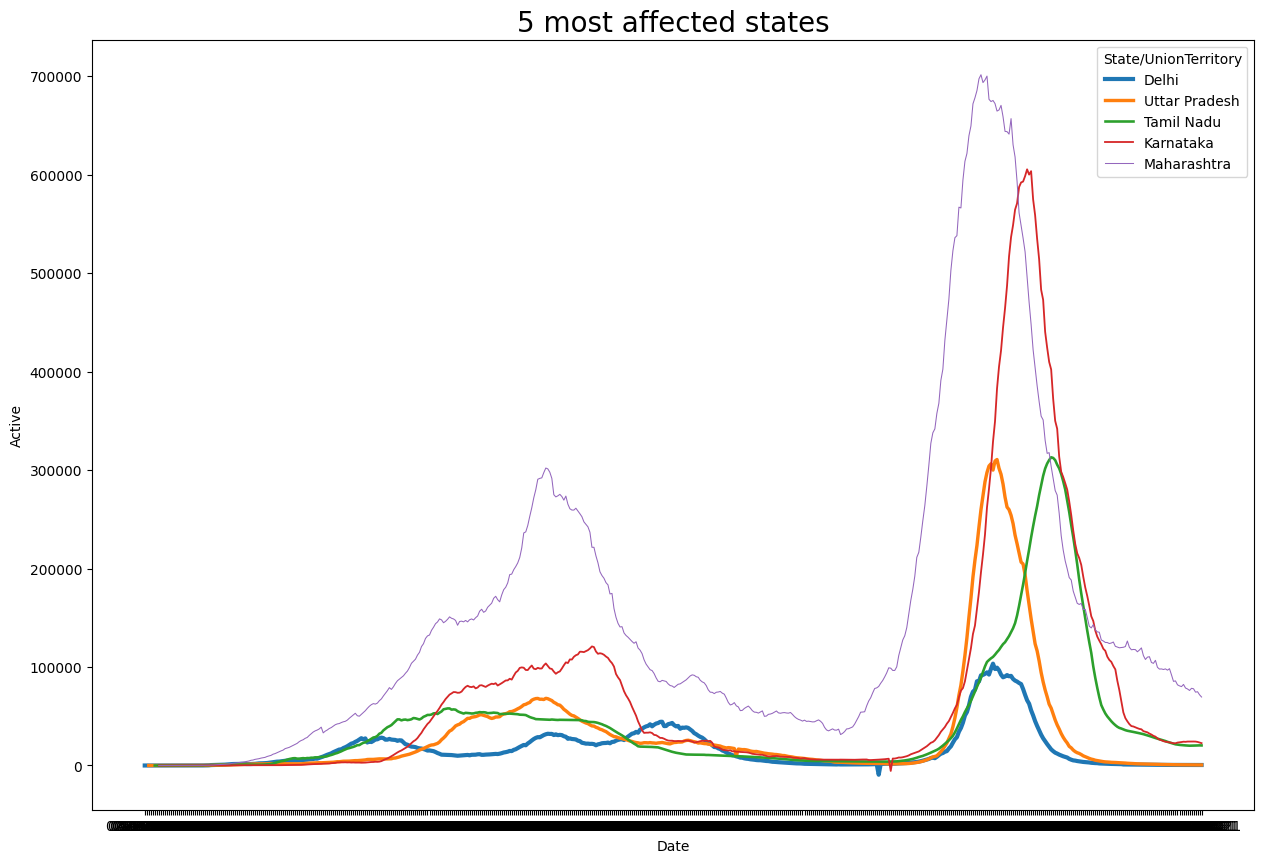

In [84]:
" Top 5 Most affected states"

fig = plt.figure(figsize=(15,10))
plot = sns.lineplot(data = df_india[df_india['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Tamil Nadu','Delhi','Uttar Pradesh'])],x='Date',y='Active',hue = 'State/UnionTerritory',size='State/UnionTerritory')
plt.title('5 most affected states',size=20)
plt.show()

<ipython-input-85-fce426f7cd62>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_india.corr(),cmap="Blues")


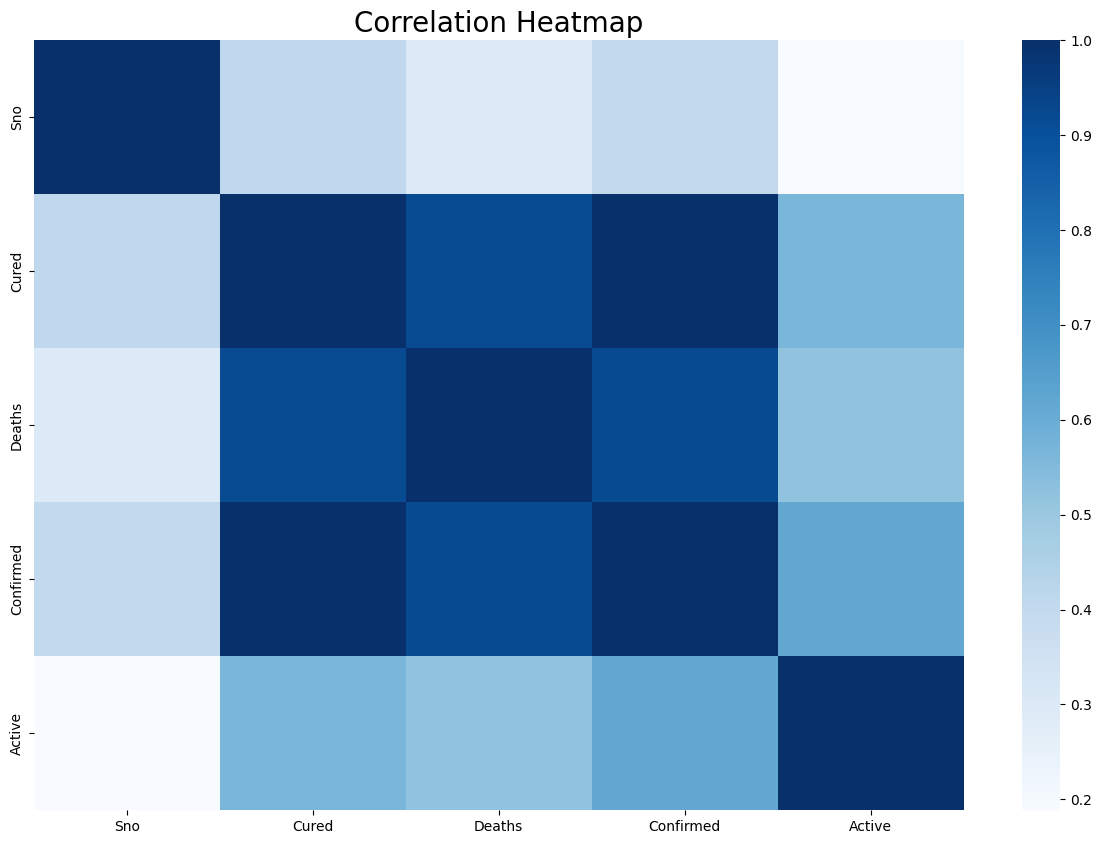

In [85]:
"Correlation Heatmap"

fig = plt.figure(figsize=(15,10))
sns.heatmap(df_india.corr(),cmap="Blues")
plt.title('Correlation Heatmap',size=20)
plt.show()

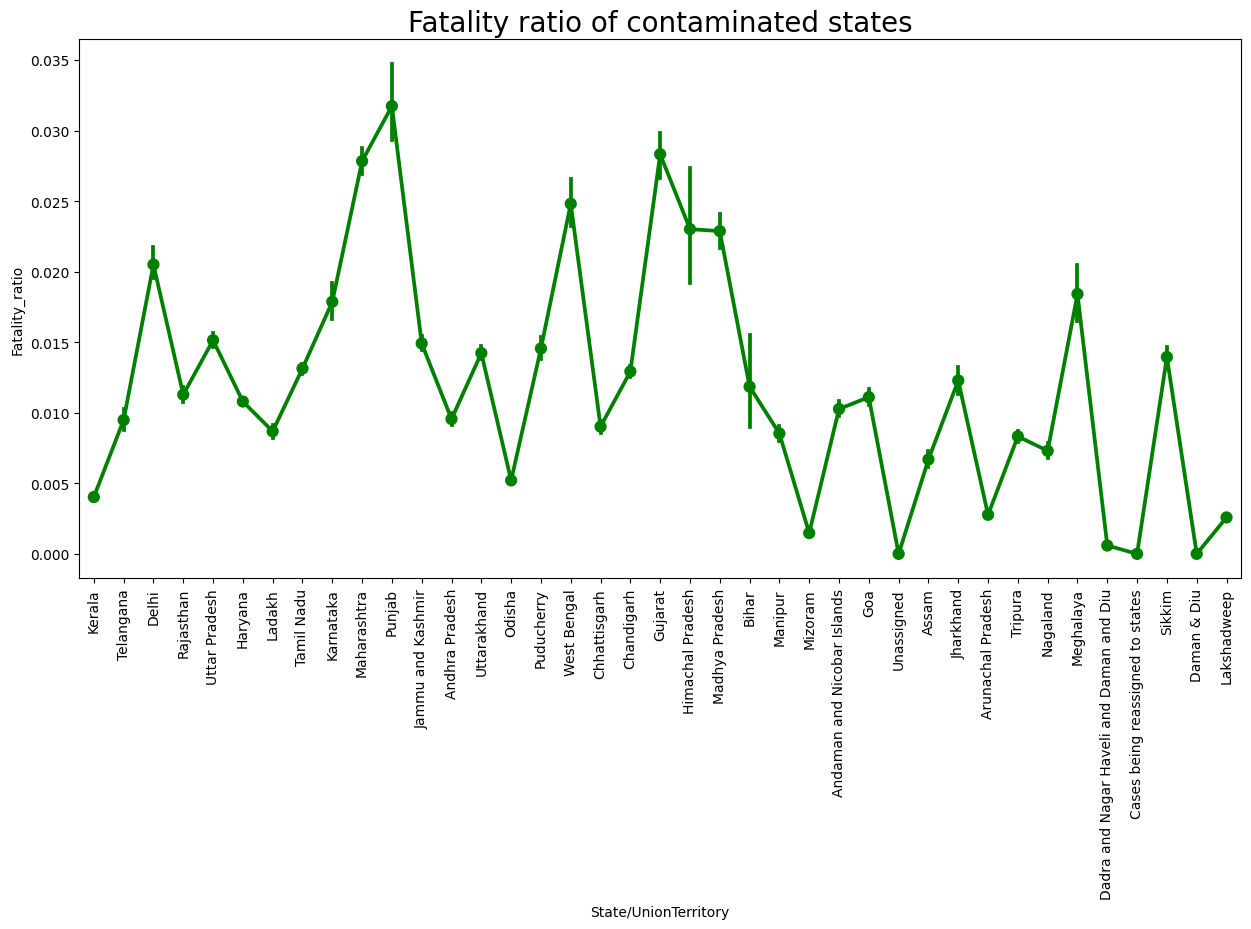

In [86]:
"Fatality ratio of contaminated states"

df_india['Fatality_ratio']= df_india['Deaths']/df_india['Confirmed']
a4_dims = (15,7)
fig,ax = plt.subplots(figsize=a4_dims)
sns.pointplot(data = df_india,x='State/UnionTerritory',y='Fatality_ratio',ax=ax,color='Green')
plt.xticks(rotation=90)
plt.title('Fatality ratio of contaminated states',size=20)
plt.show()

In [87]:
vaccine_df = pd.read_csv("covid_vaccine_statewise.csv")
vaccine_df

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
vaccine_df.rename(columns={'Updated On' : 'Vaccine_Date'}, inplace = True)
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [89]:
vaccine_df.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [90]:
vaccine_df.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [91]:
vaccine = vaccine_df.drop(columns=['18-44 Years (Doses Administered)','60+ Years (Doses Administered)','45-60 Years (Doses Administered)','Sputnik V (Doses Administered)','AEFI'],axis = 1)
vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


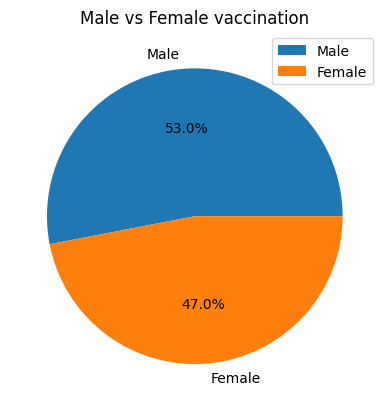

In [92]:
male = vaccine['Male(Individuals Vaccinated)'].sum()
female = vaccine['Female(Individuals Vaccinated)'].sum()
labels = ['Male','Female']
x = np.array([male,female])
plt.pie(x,labels = labels,autopct='%.1f%%')
plt.title('Male vs Female vaccination')
plt.legend()
plt.show()

In [93]:
vaccine1 = vaccine_df[vaccine_df.State != 'India']
vaccine1.rename(columns={'Total Individuals Vaccinated' : 'Total'},inplace = True)
vaccine1.head()

<ipython-input-93-52a9b0401e09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine1.rename(columns={'Total Individuals Vaccinated' : 'Total'},inplace = True)


,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [94]:
vaccine1.rename(columns={'Total Individuals Vaccinated' : 'Total'},inplace = True)
vaccine1.head()
max_vac = vaccine1.groupby('State')['Total'].sum().to_frame()
max_vac = max_vac.sort_values('Total' , ascending = False)[:5]
max_vac

<ipython-input-94-184e489011a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine1.rename(columns={'Total Individuals Vaccinated' : 'Total'},inplace = True)


,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


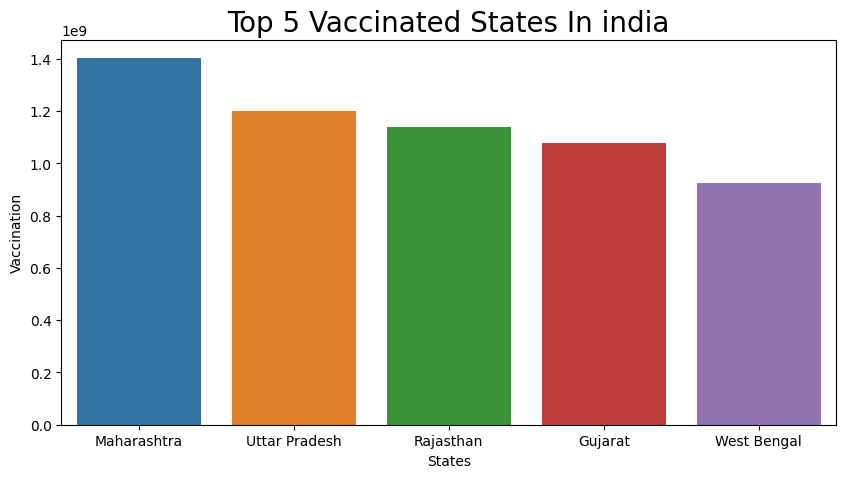

In [95]:
"Vaccination Bar Graph"
fig = plt.figure(figsize=(10,5))
plt.title("Top 5 Vaccinated States In india",size = 20)
x = sns.barplot(data = max_vac.iloc[:10],y = max_vac.Total, x = max_vac.index, linewidth = 2)
plt.xlabel('States')
plt.ylabel("Vaccination")
plt.show()